In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Item-Based Recommendation

**Contents**

- [The MovieLens dataset](#1.-The-MovieLens-dataset)
- [The movie recommendation problem](#2.-The-movie-recommendation-problem)
- [Recommendations based on rating counts](#3.-Recommendations-based-on-rating-counts)
    - [Jaccard similarity](#3.1.-Jaccard-similarity)
    - [Serendipity similiarity](#3.2.-Serendipity-similarity)
- [Recommendations based on ratings](#4.-Recommendations-based-on-ratings)
    - [Cosine similarity](#4.1-Cosine-similarity)
    - [Correlation similarity](#4.2-correlation-similarity)

## 1. The MovieLens dataset

We’ll be working with the MovieLens dataset, a common benchmark dataset for recommendation system algorithms. 

In [41]:
# the file is in a Box folder 
ratings = pd.read_csv('ratings_large.csv')
ratings

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)
...,...,...,...,...,...
10395149,283224,1388,2.0,851001995,Jaws 2 (1978)
10395150,283224,1394,3.0,851002354,Raising Arizona (1987)
10395151,283224,1396,3.0,851002354,Sneakers (1992)
10395152,283224,2019,5.0,851000812,Seven Samurai (Shichinin no samurai) (1954)


In [3]:
# number of ratings
len(ratings)

10395154

In [4]:
# number of users
len(ratings['userId'].unique())

35289

In [5]:
# number of movies
len(ratings['title'].unique())

1344

In [6]:
# list of all movies
list(ratings['title'])

['Toy Story (1995)',
 'Jumanji (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Casino (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Leaving Las Vegas (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Clueless (1995)',
 'Richard III (1995)',
 'Mortal Kombat (1995)',
 'To Die For (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 "Mr. Holland's Opus (1995)",
 'Bio-Dome (1996)',
 'From Dusk Till Dawn (1996)',
 'Broken Arrow (1996)',
 'Happy Gilmore (1996)',
 'Braveheart (1995)',
 'Birdcage, The (1996)',
 'Bad Boys (1995)',
 'Apollo 13 (1995)',
 'Rob Roy (1995)',
 'Batman Forever (1995)',
 'Casper (1995)',
 'Congo (1995)',
 'Crimson Tide (1995)',
 'Desperado (1995)',
 'Die Hard: With a Vengeance (1995)',
 'Hackers (1995)',
 'Johnny Mnemonic (1995)',
 'Judge Dredd (1995)',
 'Kids (1995)',
 'Mallrats (1995)',
 'Ne

In [7]:
# ratings
np.sort(ratings['rating'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

<AxesSubplot:xlabel='rating'>

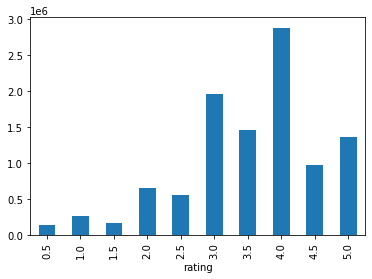

In [8]:
# rating distribution
ratings.groupby('rating')['rating'].count().plot(kind='bar')

## 2. The movie recommendation problem

Suppose a **new user** watches the movie

In [9]:
movie = "Monty Python's Life of Brian (1979)"

the goal is to recommend new movies to this user.

**Item-based recommendations** are calculated based on the similarity between items (movies) using people’s ratings on those items.

Let's create a pandas DataFrame that contains the set of user that have rated each movie.

In [10]:
movie_sets = ratings.groupby('title')['userId'].apply(set)
movie_sets

title
(500) Days of Summer (2009)                               {163851, 229392, 98341, 98342, 32808, 42, 3281...
10 Things I Hate About You (1999)                         {65544, 32785, 131095, 32795, 98341, 196649, 9...
101 Dalmatians (1996)                                     {262144, 65541, 196636, 131109, 42, 65590, 56,...
101 Dalmatians (One Hundred and One Dalmatians) (1961)    {262144, 65539, 65541, 98325, 131095, 163867, ...
12 Angry Men (1957)                                       {4, 229392, 32785, 196625, 19, 131092, 98325, ...
                                                                                ...                        
Zoolander (2001)                                          {262146, 65544, 229386, 163851, 229392, 32785,...
Zootopia (2016)                                           {278530, 81924, 253957, 57351, 106507, 163851,...
eXistenZ (1999)                                           {8194, 196611, 4, 32773, 65541, 81924, 106503,...
xXx (2002)            

In [11]:
# keep movies with at least 10 ratings
movie_sets = movie_sets[movie_sets.apply(len)>10]

## 3. Recommendations based on rating counts

### 3.1. Jaccard similarity

The **Jaccard Index** measures the similarity between two sets A and B as the size of the intersection divided by the size of the union

$$
J(A,B) = \frac{|A\cap B|}{|A\cup B|}
$$

In [12]:
def Jaccard_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_A.union(set_B))

In [13]:
# top 20 recommendations
movie_sets.apply(Jaccard_sim).sort_values(ascending=False).head(20)

title
Monty Python's Life of Brian (1979)                                               1.000000
Monty Python and the Holy Grail (1975)                                            0.586490
Fish Called Wanda, A (1988)                                                       0.449349
Clockwork Orange, A (1971)                                                        0.445657
Blade Runner (1982)                                                               0.445490
2001: A Space Odyssey (1968)                                                      0.444474
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.439354
Star Wars: Episode IV - A New Hope (1977)                                         0.437053
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.436310
Alien (1979)                                                                      0.435004
Back to the Future (1985)                                                         0.

### 3.2. Serendipity (or overlap) similarity

The **Serendipity Index** measures the similarity between two sets A and B as the size of the intersection divided by the size of the set B

$$
S(A,B) = \frac{|A\cap B|}{|B|}
$$

In [14]:
def Serendipity_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_B)

In [15]:
movie_sets.apply(Serendipity_sim).sort_values(ascending=False).head(20)

title
Monty Python's Life of Brian (1979)                                 1.000000
Monty Python's And Now for Something Completely Different (1971)    0.855663
Monty Python's The Meaning of Life (1983)                           0.845268
Return of the Pink Panther, The (1975)                              0.725561
History of the World: Part I (1981)                                 0.684424
Duck Soup (1933)                                                    0.679626
Sleeper (1973)                                                      0.675720
Producers, The (1968)                                               0.675028
Yellow Submarine (1968)                                             0.673108
Being There (1979)                                                  0.668960
Name of the Rose, The (Name der Rose, Der) (1986)                   0.661648
Seventh Seal, The (Sjunde inseglet, Det) (1957)                     0.658739
Pink Floyd: The Wall (1982)                                         0.

## 4. Recommendations based on ratings

In [42]:
# the ratings matrix
ratings_matrix = ratings.pivot(index='userId',columns='title',values='rating')
ratings_matrix

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)","2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",...,You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,1.5,NaN,NaN,1.0,NaN,2.0,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.5,3.0
19,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,...,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
51,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283184,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
283185,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283195,NaN,2.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,4.0,4.5,NaN,3.5,NaN,NaN,NaN,4.5


In [17]:
ratings_matrix.shape

(35289, 1344)

In [43]:
movie = 'Dark City (1998)' # sci-fi movie; similar to 'the matrix'

In [44]:
movie1 = 'Matrix, The (1999)'
movie2 = 'Frozen (2013)'

In [45]:
x = ratings_matrix.loc[:, movie]
y1 = ratings_matrix.loc[:, movie1]
y2 = ratings_matrix.loc[:, movie2]

In [46]:
x

userId
4         5.0
19        NaN
42        NaN
43        NaN
51        NaN
         ... 
283184    NaN
283185    NaN
283195    4.0
283204    NaN
283224    NaN
Name: Dark City (1998), Length: 35289, dtype: float64

### 4.1. Cosine similarity

In [36]:
def cosine_sim(col_B):
    col_A = ratings_matrix.loc[:,movie]
    # similarity between col_A and col_B
    norm_A = np.sqrt(np.sum(col_A**2))
    norm_B = np.sqrt(np.sum(col_B**2))
    return np.sum(col_A*col_B)/(norm_A*norm_B)

In [37]:
# similarity between Dark City and The Matrix
cosine_sim(y1)

0.5357401524461297

In [38]:
# similarity between Dark City and Frozen
cosine_sim(y2)

0.1377237178005576

In [39]:
# top 20 recommendations;
ratings_matrix.apply(cosine_sim).sort_values(ascending=False).head(20)

title
Dark City (1998)                                         1.000000
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                0.566409
Gattaca (1997)                                           0.559822
Blade Runner (1982)                                      0.552317
Fifth Element, The (1997)                                0.538819
Matrix, The (1999)                                       0.535740
Alien (1979)                                             0.528712
Aliens (1986)                                            0.525598
Terminator 2: Judgment Day (1991)                        0.523453
Total Recall (1990)                                      0.518636
Terminator, The (1984)                                   0.511142
Star Wars: Episode V - The Empire Strikes Back (1980)    0.502098
Starship Troopers (1997)                                 0.501088
Star Wars: Episode IV - A New Hope (1977)                0.495664
Pulp Fiction (1994)                                      0.493738
2001

In [23]:
# bottom 20 recommendations
ratings_matrix.apply(cosine_sim).sort_values(ascending=False).tail(20)

title
To Wong Foo, Thanks for Everything! Julie Newmar (1995)    0.128783
Wedding Planner, The (2001)                                0.128718
Now You See Me (2013)                                      0.127947
Circle of Friends (1995)                                   0.127890
Parent Trap, The (1961)                                    0.126986
Perks of Being a Wallflower, The (2012)                    0.126694
The Hunger Games: Mockingjay - Part 1 (2014)               0.125724
Miracle on 34th Street (1994)                              0.125107
13 Going on 30 (2004)                                      0.123044
Forget Paris (1995)                                        0.120409
Beverly Hillbillies, The (1993)                            0.117893
Little Princess, A (1995)                                  0.117308
Princess Diaries, The (2001)                               0.115596
Juror, The (1996)                                          0.114472
Help, The (2011)                          

### 4.2 Correlation similarity

In [19]:
# compute means; np.mean ignores NaNs
mean_x = np.mean(x)
mean_y1 = np.mean(y1)
mean_y2 = np.mean(y2)

In [20]:
mean_y1

4.139087733858975

In [21]:
# correlation similarity between movie and movie1
np.sum((x-mean_x)*(y1-mean_y1))/np.sqrt(np.sum((x-mean_x)**2)*np.sum((y1-mean_y1)**2))

0.1020313770994446

In [22]:
# correlation similarity between movie and movie2
np.sum((x-mean_x)*(y2-mean_y2))/np.sqrt(np.sum((x-mean_x)**2)*np.sum((y2-mean_y2)**2))

0.022055918161976364

In [34]:
def correlation_sim(col_B):
    col_A = ratings_matrix.loc[:,movie]
    
    # means
    mean_A = np.mean(col_A)
    mean_B = np.mean(col_B)
    # norms
    norm_A = np.sqrt(np.sum((col_A-mean_A)**2))
    norm_B = np.sqrt(np.sum((col_B-mean_B)**2))
    # dot product
    dot = np.sum((col_A-mean_A)*(col_B-mean_B))
    return dot/(norm_A*norm_B)

In [35]:
# top 20
ratings_matrix.apply(correlation_sim).sort_values(ascending=False).head(20)

title
Dark City (1998)                                                   1.000000
Gattaca (1997)                                                     0.172906
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                          0.158235
Crow, The (1994)                                                   0.132797
Fifth Element, The (1997)                                          0.132455
Pi (1998)                                                          0.129861
City of Lost Children, The (Cité des enfants perdus, La) (1995)    0.124711
eXistenZ (1999)                                                    0.121718
Cube (1997)                                                        0.116946
Truman Show, The (1998)                                            0.115161
Blade Runner (1982)                                                0.115103
Sleepy Hollow (1999)                                               0.113087
Total Recall (1990)                                                0.110739
Army o

In [25]:
# bottom 20
ratings_matrix.apply(correlation_sim).sort_values(ascending=False).tail(20)

title
Flubber (1997)                                           0.015415
Speed 2: Cruise Control (1997)                           0.015300
Juror, The (1996)                                        0.015178
Showgirls (1995)                                         0.013851
Amazing Spider-Man, The (2012)                           0.013387
Princess Diaries, The (2001)                             0.013345
Matilda (1996)                                           0.013073
She's All That (1999)                                    0.012481
Terms of Endearment (1983)                               0.011920
Wedding Planner, The (2001)                              0.011848
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    0.011735
Richie Rich (1994)                                       0.009704
Hitch (2005)                                             0.009224
Sgt. Bilko (1996)                                        0.009076
Milk Money (1994)                                        0.007940
Twil

In [26]:
# alternatively, you can use pandas built-in function: "corrwith"
ratings_matrix.corrwith(ratings_matrix.loc[:,movie]).sort_values(ascending=False).head(20)

title
Dark City (1998)                                                   1.000000
Moon (2009)                                                        0.319027
Gattaca (1997)                                                     0.313716
Let the Right One In (Låt den rätte komma in) (2008)               0.313625
The Machinist (2004)                                               0.310799
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                          0.307790
Crow, The (1994)                                                   0.305959
City of Lost Children, The (Cité des enfants perdus, La) (1995)    0.302859
Equilibrium (2002)                                                 0.302853
Cabin in the Woods, The (2012)                                     0.298835
Jacob's Ladder (1990)                                              0.289609
Coraline (2009)                                                    0.287601
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986)          0.287516
Illusi